The data was captured from Kaggle: https://www.kaggle.com/datasets/athu1105/book-genre-prediction?resource=download

In [1]:
#read the downloaded data frame
import pandas as pd
Data_frame = pd.read_csv('data.csv')
Data_frame.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [2]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


Based on the above cell we have 4657 rows, 4 columns representing index, title, genre and summary. It is mentioned that there are no null values but just in case we will also check it in the following cells.

# Preprocessing
## Null/Nan values

In [3]:
#function to check Null and NA values for each column
def finding_missing_data(data_frame, column):
    data_frame_null = data_frame[column].isnull()
    data_frame_nan = data_frame[column].isna()
    missing_null = data_frame_null.sum()
    missing_nan = data_frame_nan.sum()
    print('number of Null values in %s is %i' % (column, missing_null))
    print('number of NA values in %s is %i' % (column, missing_nan))


In [4]:
attrs = ['title', 'genre', 'summary']
for attr in attrs:
    finding_missing_data(Data_frame, attr)

number of Null values in title is 0
number of NA values in title is 0
number of Null values in genre is 0
number of NA values in genre is 0
number of Null values in summary is 0
number of NA values in summary is 0


## Duplicates

In [5]:
# find the frequency of each genre
genre_counts = Data_frame['genre'].value_counts()
genre_counts

genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64

Based on the above cell we have 10 genres, the number of each sample is also provided and we can find that our data is imbalanced.
        

In [6]:
Data_frame.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

In the above cell, we can find out that there are some repetitive titles and summaries by comparing these 2 rows, unique numbers with the index. therefore, we have 361 of the same titles and 115 same summary. In the case of titles, if the summary is different I do not think that it would be a problem.

In [7]:
# Find duplicate titles
duplicate_titles_count = Data_frame['title'].value_counts()

# Filter out titles with counts greater than 1
non_unique_titles = duplicate_titles_count[duplicate_titles_count > 1]

# Convert Series to DataFrame
non_unique_titles_df = pd.DataFrame({'title': non_unique_titles.index, 'count': non_unique_titles.values})

non_unique_titles_df.head()

,title,count
0,Bloodline,4
1,Nemesis,4
2,The Hunger Games,4
3,The Enemy,3
4,Stone Cold,3


In [8]:
import pandas as pd

# Initialize an empty list to store the data
title_index_pairs = []

# Iterate over non-unique titles
for title in non_unique_titles.index:
    # Filter data frame for the current title
    title_df = Data_frame[Data_frame['title'] == title]
    
    # Extract unique summaries for the current title
    unique_summaries = title_df['summary'].unique()
    
    # Check if there is only one unique summary
    if len(unique_summaries) == 1:
        # Get the indices of the instances with the same summary
        indices = title_df.index.tolist()
        
        # Append the title and its corresponding indices to the list
        title_index_pairs.append({'title': title, 'indices': indices})

titles_indices_df = pd.DataFrame(title_index_pairs)


titles_indices_df.head()

,title,indices
0,The Radium Girls: The Dark Story of America's ...,"[3037, 3038, 3502]"
1,Divergent,"[3330, 4424]"
2,The Cabin at the End of the World,"[3137, 3854]"
3,"Guns, Germs, and Steel: The Fates of Human Soc...","[3001, 3429]"
4,Rose Madder,"[3142, 4091]"


In [9]:
# Update the 'indices' column to keep all elements except the first one in each list
titles_indices_df['indices'] = titles_indices_df['indices'].apply(lambda x: x[1:])

titles_indices_df.head()


,title,indices
0,The Radium Girls: The Dark Story of America's ...,"[3038, 3502]"
1,Divergent,[4424]
2,The Cabin at the End of the World,[3854]
3,"Guns, Germs, and Steel: The Fates of Human Soc...",[3429]
4,Rose Madder,[4091]


In [10]:
nondup_df = Data_frame.copy()

In [11]:
for _, row in titles_indices_df.iterrows():
    # Extract indices from the current row
    indices_to_drop = row['indices']
    
    # Drop rows from nondup_df based on the indices
    nondup_df = nondup_df.drop(indices_to_drop)

nondup_df = nondup_df.reset_index(drop=True)

nondup_df.head()


,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [12]:
nondup_df.to_csv("nondup.csv")

In [13]:
nondup_df = pd.read_csv("nondup.csv")

In [14]:
# genere count after removing duplicates
genre_counts_without_duplicate = nondup_df['genre'].value_counts()
genre_counts_without_duplicate

genre
thriller      998
fantasy       860
science       626
horror        600
history       599
crime         500
romance       111
psychology     99
travel         98
sports         81
Name: count, dtype: int64

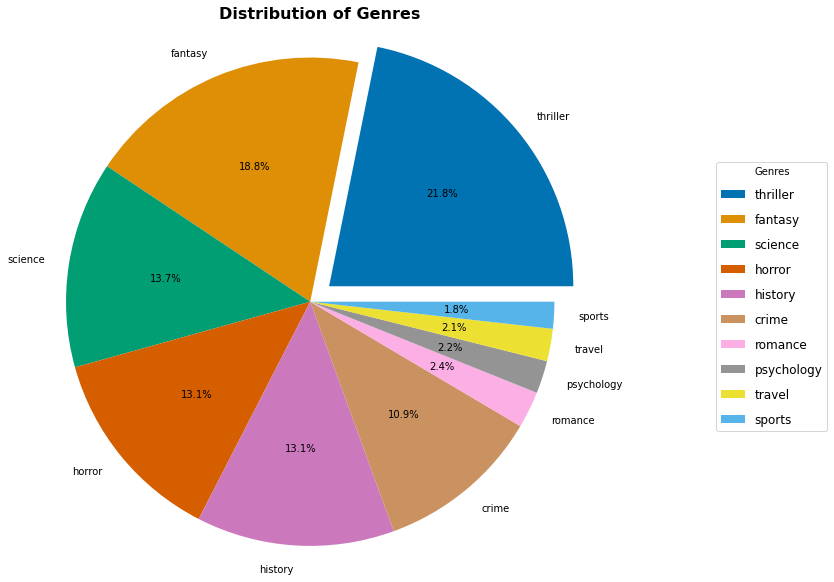

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = genre_counts_without_duplicate.index
sizes = genre_counts_without_duplicate.values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

#the pie
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Genres' ,y=1, fontsize=16, fontweight='bold')

# The legend
plt.gca().set_aspect('equal')
plt.gca().legend(labels, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Genres',
                         labelspacing=1, fontsize='large')
plt.show()

## Lowercasing, Stopwords, Punctuations

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')

# Create a tokenizer that matches word characters
tokenizer_regex = RegexpTokenizer(r'\w+')

# Define a function to remove stopwords, punctuation, and lowercase the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Lowercase the text
    text = text.lower()
    # Tokenize the text and remove punctuation
    tokens_without_punctuation = tokenizer_regex.tokenize(text)
    # Filter out stopwords
    filtered_tokens = [word for word in tokens_without_punctuation if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
nondup_df['modified'] = nondup_df['summary'].apply(preprocess_text)
nondup_df.head()

,Unnamed: 0,index,title,genre,summary,modified
0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...
1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...
2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...
3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...
4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...


In [18]:
lemma_df = nondup_df.copy()

## lemmatization

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

# lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

lemma_df['modified_lemmatized'] = lemma_df['modified'].apply(lemmatize_text)

lemma_df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized
0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...
1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...
2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...
3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...
4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...


In [20]:
lemma_df.to_csv("lemma_df.csv")

In [21]:
lemma_df = pd.read_csv("lemma_df.csv")

## Tokenization

In [22]:
tokenized_df = lemma_df.copy()

In [23]:
# tokenize the text
from nltk.tokenize import word_tokenize
tokenized_df['word_tokenized_summary'] = tokenized_df['modified_lemmatized'].apply(word_tokenize)
tokenized_df.head()

,Unnamed: 0.1,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized,word_tokenized_summary
0,0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...,"[drowned, wednesday, first, trustee, among, mo..."
1,1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...,"[book, open, jason, awakens, school, bus, unab..."
2,2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,"[cugel, easily, persuaded, merchant, fianosthe..."
3,3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...,"[book, open, herald, mage, vanyel, returning, ..."
4,4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,"[taran, gurgi, returned, caer, dallben, follow..."


In [24]:
tokenized_df.to_csv("token.csv")

In [25]:
tokenized_df = pd.read_csv("token.csv")

## NER tags

In [26]:
NER_df = tokenized_df.copy()

In [27]:
import spacy
import spacy.cli

# Download the English language model
spacy.cli.download("en_core_web_sm")

# Load the English language model
sp_sm = spacy.load("en_core_web_sm")

def spacy_larg_ner_1(document):
    # Extract NER tags from the document and return the labels
    return ' '.join(str(ent.label_) for ent in sp_sm(document).ents)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
NER_df['NER'] = NER_df['modified_lemmatized'].apply(spacy_larg_ner_1)
NER_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized,word_tokenized_summary,NER
0,0,0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...,"['drowned', 'wednesday', 'first', 'trustee', '...",PERSON DATE PERSON DATE CARDINAL PERSON PERSON...
1,1,1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...,"['book', 'open', 'jason', 'awakens', 'school',...",ORG DATE CARDINAL CARDINAL ORG CARDINAL CARDIN...
2,2,2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,"['cugel', 'easily', 'persuaded', 'merchant', '...",CARDINAL CARDINAL PERSON DATE DATE
3,3,3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...,"['book', 'open', 'herald', 'mage', 'vanyel', '...",PERSON ORG CARDINAL CARDINAL PRODUCT CARDINAL ...
4,4,4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,"['taran', 'gurgi', 'returned', 'caer', 'dallbe...",ORDINAL PERSON DATE CARDINAL DATE ORDINAL PERS...


In [29]:
NER_df.to_csv('NER_df.csv')

In [30]:
NER_df = pd.read_csv('NER_df.csv')

Thriller and fantasy genres were chosen as they had the most occurrence in our data set.

In [31]:
# keep the fantasy and thriller genres only
filtered_df = NER_df[NER_df['genre'].isin(['thriller', 'fantasy'])]

filtered_df.head()


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized,word_tokenized_summary,NER
0,0,0,0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...,"['drowned', 'wednesday', 'first', 'trustee', '...",PERSON DATE PERSON DATE CARDINAL PERSON PERSON...
1,1,1,1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...,"['book', 'open', 'jason', 'awakens', 'school',...",ORG DATE CARDINAL CARDINAL ORG CARDINAL CARDIN...
2,2,2,2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,"['cugel', 'easily', 'persuaded', 'merchant', '...",CARDINAL CARDINAL PERSON DATE DATE
3,3,3,3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...,"['book', 'open', 'herald', 'mage', 'vanyel', '...",PERSON ORG CARDINAL CARDINAL PRODUCT CARDINAL ...
4,4,4,4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,"['taran', 'gurgi', 'returned', 'caer', 'dallbe...",ORDINAL PERSON DATE CARDINAL DATE ORDINAL PERS...


In [32]:
filtered_df.to_csv('filtered_df.csv')

In [33]:
filtered_df = pd.read_csv('filtered_df.csv')

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode the genres
label_encoder = LabelEncoder()
filtered_df.loc[:, 'genre_encoded'] = label_encoder.fit_transform(filtered_df['genre'])


In [35]:
filtered_df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized,word_tokenized_summary,NER,genre_encoded
0,0,0,0,0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...,"['drowned', 'wednesday', 'first', 'trustee', '...",PERSON DATE PERSON DATE CARDINAL PERSON PERSON...,0
1,1,1,1,1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...,"['book', 'open', 'jason', 'awakens', 'school',...",ORG DATE CARDINAL CARDINAL ORG CARDINAL CARDIN...,0
2,2,2,2,2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,"['cugel', 'easily', 'persuaded', 'merchant', '...",CARDINAL CARDINAL PERSON DATE DATE,0
3,3,3,3,3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...,"['book', 'open', 'herald', 'mage', 'vanyel', '...",PERSON ORG CARDINAL CARDINAL PRODUCT CARDINAL ...,0
4,4,4,4,4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,"['taran', 'gurgi', 'returned', 'caer', 'dallbe...",ORDINAL PERSON DATE CARDINAL DATE ORDINAL PERS...,0


In [36]:
# distribution of our two selected genres
genre_count_filtered = filtered_df['genre'].value_counts()
genre_count_filtered

genre
thriller    998
fantasy     860
Name: count, dtype: int64

In [37]:
# Drop rows with NaN values in NER column
filtered_df.dropna(subset=['NER'], inplace=True)


# Models
## Models based on NER tags

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_df['NER'], filtered_df['genre_encoded'], test_size=0.3, random_state=42)

def evaluate_model(classifier, X_train, X_test, y_train, y_test):
    # Initialize TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Initialize and train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Predict on the testing data
    predictions = classifier.predict(X_test_tfidf)

    # Calculate f1 and confusion matrix
    f1 = f1_score(y_test, predictions, average='weighted')
    cm = confusion_matrix(y_test, predictions)
        
    return f1, cm


In [40]:
# data frame to present scores of classifiers
results_df = pd.DataFrame(columns=['Classifier', 'F1 Score'])

# empty dictionary to store confusion matrices
confusion_matrices = {}

for classifier in classifiers:
    f1, cm = evaluate_model(classifier, X_train, X_test, y_train, y_test)
    results_df.loc[len(results_df)] = [type(classifier).__name__, f1]
    confusion_matrices[type(classifier).__name__] = cm

# Present results
for classifier_name, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {classifier_name}:")
    print(cm)
    print("\n")
    
results_df


Confusion Matrix for LogisticRegression:
[[140 110]
 [ 83 212]]


Confusion Matrix for GradientBoostingClassifier:
[[135 115]
 [ 82 213]]


Confusion Matrix for AdaBoostClassifier:
[[159  91]
 [ 95 200]]




,Classifier,F1 Score
0,LogisticRegression,0.643513
1,GradientBoostingClassifier,0.635334
2,AdaBoostClassifier,0.658905


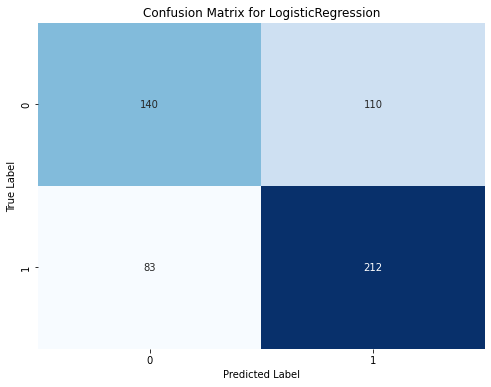

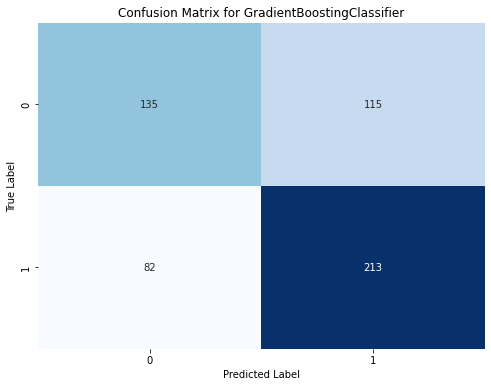

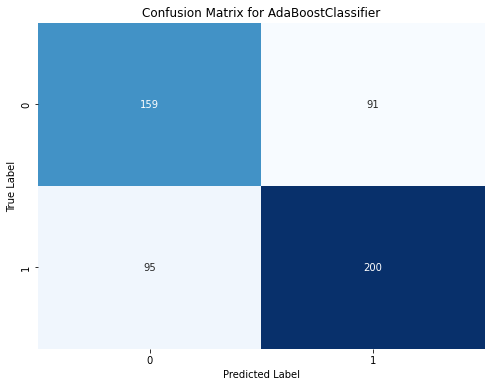

In [41]:
for classifier_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Topic modelling

In [42]:
LDA_df = NER_df.copy()

In [43]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora


# Tokenize the lemmatized text (word level)
LDA_df['tokenized_summary'] = LDA_df['modified_lemmatized'].apply(lambda x: x.split())

# Create a dictionary and corpus
dictionary = corpora.Dictionary(LDA_df['tokenized_summary'])
corpus = [dictionary.doc2bow(summary) for summary in LDA_df['tokenized_summary']]


# Train the LDA model
lda_model = LdaModel(corpus, num_topics=11, id2word=dictionary, passes=15)

# get the topic distribution for a given summary
def get_topic_distribution(summary):
    bow = dictionary.doc2bow(summary)
    topic_distribution = lda_model.get_document_topics(bow)
    return topic_distribution

# Apply the function
LDA_df['topic_distribution'] = LDA_df['tokenized_summary'].apply(get_topic_distribution)


In [44]:
LDA_df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,title,genre,summary,modified,modified_lemmatized,word_tokenized_summary,NER,tokenized_summary,topic_distribution
0,0,0,0,0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...,"['drowned', 'wednesday', 'first', 'trustee', '...",PERSON DATE PERSON DATE CARDINAL PERSON PERSON...,"[drowned, wednesday, first, trustee, among, mo...","[(2, 0.32231104), (4, 0.5424844), (5, 0.022508..."
1,1,1,1,1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book opens jason awakens school bus unable rem...,book open jason awakens school bus unable reme...,"['book', 'open', 'jason', 'awakens', 'school',...",ORG DATE CARDINAL CARDINAL ORG CARDINAL CARDIN...,"[book, open, jason, awakens, school, bus, unab...","[(0, 0.025522407), (2, 0.6696204), (4, 0.14839..."
2,2,2,2,2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,"['cugel', 'easily', 'persuaded', 'merchant', '...",CARDINAL CARDINAL PERSON DATE DATE,"[cugel, easily, persuaded, merchant, fianosthe...","[(0, 0.15556018), (2, 0.050337523), (4, 0.6868..."
3,3,3,3,3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book opens herald mage vanyel returning countr...,book open herald mage vanyel returning country...,"['book', 'open', 'herald', 'mage', 'vanyel', '...",PERSON ORG CARDINAL CARDINAL PRODUCT CARDINAL ...,"[book, open, herald, mage, vanyel, returning, ...","[(0, 0.22220622), (2, 0.11120359), (4, 0.08148..."
4,4,4,4,4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,"['taran', 'gurgi', 'returned', 'caer', 'dallbe...",ORDINAL PERSON DATE CARDINAL DATE ORDINAL PERS...,"[taran, gurgi, returned, caer, dallben, follow...","[(0, 0.07240386), (4, 0.741864), (5, 0.1512242..."


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import numpy as np

# Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# data frame to present scores of classifiers
results_df2 = pd.DataFrame(columns=['Classifier', 'F1 Score'])

# empty dictionary to store confusion matrices
confusion_matrices = {}

# data preparation
X = LDA_df['topic_distribution'].apply(lambda x: [topic[1] for topic in x])  # Extracting topic probabilities
y = LDA_df['genre']  #target variable

# Find the maximum length of lists
max_len = max(len(x) for x in X)

# Pad the lists to the maximum length
X_padded = [x + [0] * (max_len - len(x)) for x in X]

# Convert padded lists to a NumPy array
X = np.array(X_padded)

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    cm = confusion_matrix(y_test, y_pred)
    
    results_df2.loc[len(results_df2)] = [type(classifier).__name__, f1]
    
    confusion_matrices[type(classifier).__name__] = cm

# Present results
for classifier_name, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {classifier_name}:")
    print(cm)
    print("\n")

results_df2


Confusion Matrix for LogisticRegression:
[[  3  42  18   3   0   0  11   0  96   0]
 [  0 136  23   9   0   0   7   0 113   0]
 [  1  36  31   2   0   0   4   0  97   0]
 [  0  30  25   9   0   0   3   0 109   0]
 [  0   5   0   1   0   0   0   0  23   0]
 [  0   9   0   0   0   0   0   0  13   0]
 [  2  46  18   5   0   0   3   0  89   0]
 [  0   4   0   0   0   0   0   0  18   0]
 [  1  88  13   5   0   0  10   0 186   0]
 [  0  12   0   0   0   0   1   0  12   0]]


Confusion Matrix for GradientBoostingClassifier:
[[ 10  37  17  11   2   2  26   3  62   3]
 [ 14  99  25  16   3   1  28   7  94   1]
 [  8  35  32  11   3   1  14   1  66   0]
 [ 10  30  22  23   1   0  10   1  78   1]
 [  0   2   3   1   2   1   3   0  17   0]
 [  0   8   0   0   1   0   0   0  13   0]
 [ 14  35  11  13   0   1  23   1  65   0]
 [  0   2   1   3   1   1   0   1  13   0]
 [ 13  54  24  30   4   8  17   0 150   3]
 [  0   9   1   1   3   0   1   0   9   1]]


Confusion Matrix for AdaBoostClassifier:
[[ 

,Classifier,F1 Score
0,LogisticRegression,0.204184
1,GradientBoostingClassifier,0.225512
2,AdaBoostClassifier,0.201997


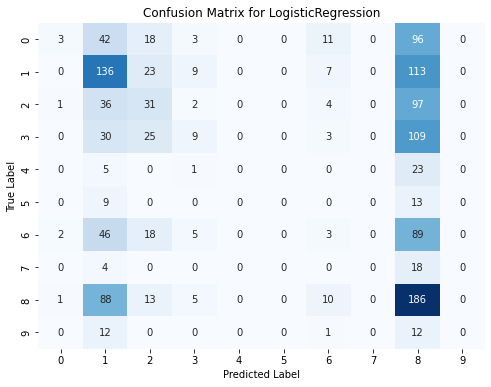

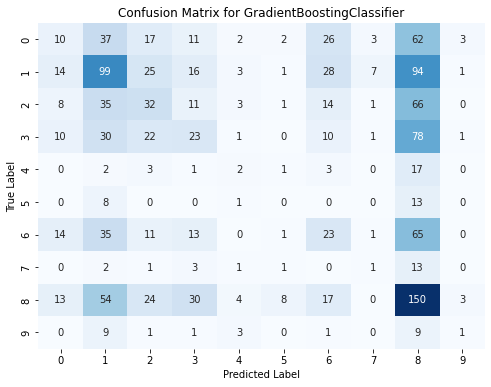

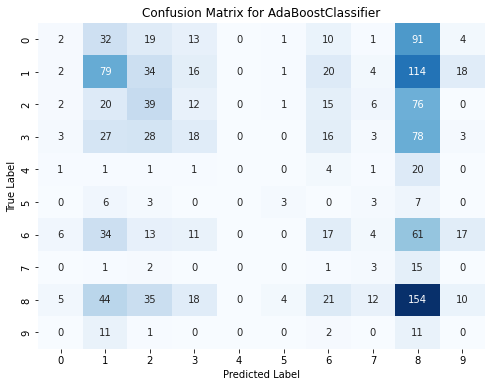

In [46]:
for classifier_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()